In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Toolkit

* **Data**: The raw material for insights and predictions in machine learning.

* **Data Processing Methods**: Prepare and refine data for effective model training.

* **Trainable Model that "Relate" Data**: The engine that learns patterns from data.

* **A Quality Function**: Measures and improves model performance.

* **A strategy**: The searching for the best parameter of the model.

Right now the data consisted in the Engine size and the Fuel Consuption.

The preprocessing methods were the $min/max$ (it helped to get rid of q). And the splitting of the data.

The model was the function $f(x) = m x + q$

The quality function the $MAE(m, q)$.

The strategy was the gradient descent.

# Your first neural network (MNIST)

Chapter 1 from Deep Learning with TensorFlow and Keras

* **TensorFlow** library is a  framework for deep learning. It is used for creating and training neural networks.

* **NumPy** library is used for scientific computing and numerical operations on arrays.
It is commonly used for processing data before feeding it into a model.

* **Keras** from TensorFlow is a high-level API for building and training neural network models.
It allows for rapid development and training of models with minimal code.

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a dataset containing handwritten digits for image recognition tasks.


In [3]:
# Load the data
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Convert the NumPy arrays to Pandas DataFrames for description
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))  # Reshape for DataFrame
# So we are reshaping teh dataset to have only one row (since the images are 28x28 pixels, we have 784-1 columns)
# N.B.: each column represent a pixel!

# Now you can call describe() on the DataFrames
display(X_train_df.describe())


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [5]:
# Let's have a closer look
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
Y_train[0]

np.uint8(5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


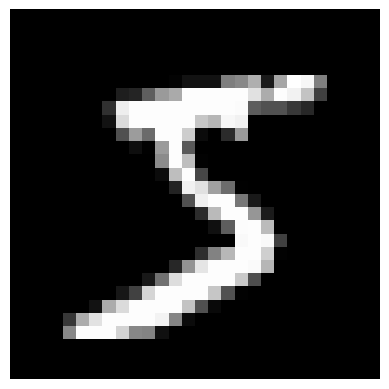

In [8]:
plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
plt.axis(False)
plt.show()

## Preprocessing

### Image preprocessing

To keep model parameter values and loss function values under control in the training phase, it is good to normalise the pixel values from the range $[0,255]$ to $[0,1]$.

Notice that this step is not mandatory, but it will increase the quality of the search.

Additionally, it's important to note that each entry is a 28x28 matrix. Given that our model requires 1-dimensional vectors as input, we'll need to reshape the input data accordingly.

In [9]:
# X_train is 60000 (X_train.shape[0]) rows of 28x28 values; we --> reshape it to 60000 x 784.
RESHAPED = 28 * 28

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize inputs to be within in [0, 1].
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#print(X_train[0])

60000 train samples
10000 test samples


In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Output preprocessing

In [11]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

The y-values span 0 to 9, indicating a classification problem where we aim to predict the likelihood of an input belonging to classes 0 through 9. To make the output more suitable for a classification problem, we apply one-hot encoding to the variable $y$, transforming it into a *binary* matrix representation for each class (each label is represented as a vector with all zeros except for a 1 at the index corresponding to the label).

In [12]:
# One-hot representation of the labels.
NB_CLASSES = 10 # number of outputs = number of digits
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

## Building the model

In [13]:
### In this model we have only one layer.

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, #number of units (neurons)
                              input_shape=(RESHAPED,),
                              name='dense_layer', # a name to the layer
                              activation='softmax')) #activation function

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The model has 784 input neurons (for each feature) and 10 output neurons (for class probabilities).

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)             │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

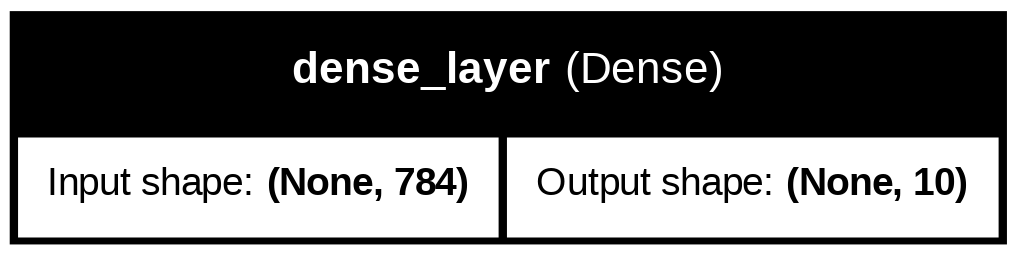

In [14]:
# Generate a model summary
model.summary() #a summary of the model's architecture

# For a graphical visualization
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# To display the image in Colab
#from IPython.display import Image
#Image('model.png')

### **N.B.:**  we have $Param = 7850$  because it represents:
$weights + bias$
where $weights = input * output = 784 * 10$ and         
$bias = 10$ (one for each neuron)

### Compile the model

We have to specify the optimizer, loss function, and evaluation metrics that the model will use during training

In [15]:
model.compile(optimizer='SGD',  ## "SGD" wasn't good.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Optimizer (SGD)**: Strategy to adjust model weights to minimize loss. Stochastic Gradient Descent (SGD) updates weights using a subset of data, balancing efficiency and accuracy.

**Loss (categorical_crossentropy)**: Measures model's error for multi-class classification. Lower values indicate better performance.

* $H(p,q) = - \sum_x p(x)log(q(x))$
* $p(x)$ is the true probability of outcome $x$
* $q(x)$ is the estimated probability of outcome $x$

**Metric (accuracy)**: Percentage of correctly predicted instances.

### **Batch size**

Batch size refers to the number of training examples utilized in one iteration of model training.

### **Validation step**
The validation step in machine learning is a process where the trained model is evaluated with a separate dataset. This dataset is not used during the training of the model but is instead used to check how well the model generalizes to new, unseen data. Essentially, validation helps assess the model’s performance on data it hasn't seen before and can reveal whether the model is "overfitting" (memorizing the training data too well) and therefore unable to generalize effectively to new data.

**N.B.:** each column represent an epoch.
<img src='https://miro.medium.com/v2/resize:fit:1200/1*GH7h526OcmtDy3Q1jeOjHw.png'>

### **Epoch**
An epoch in machine learning is a complete pass through the entire training dataset by the learning algorithm.



In [16]:
# Network and training parameters.
EPOCHS = 200
BATCH_SIZE = 32*1500 # how many training examples are processed together in one forward pass through the model --> each epoch has 1500 iteration, because the batch size is 32 (48000 which is the training set is divided by 32 = 1500)
VERBOSE = 1 #0: Silent training (no output), 1: Progress bar (shows a progress bar for each epoch),2: One line per epoch (shows a summary for each epoch).
NB_CLASSES = 10 # number of outputs = number of digits
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# Training the model
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1110 - loss: 2.4773 - val_accuracy: 0.1186 - val_loss: 2.4542
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.1154 - loss: 2.4572 - val_accuracy: 0.1224 - val_loss: 2.4352
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.1199 - loss: 2.4382 - val_accuracy: 0.1258 - val_loss: 2.4173
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1228 - loss: 2.4204 - val_accuracy: 0.1293 - val_loss: 2.4003
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.1263 - loss: 2.4034 - val_accuracy: 0.1332 - val_loss: 2.3840
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1292 - loss: 2.3873 - val_accuracy: 0.1366 - val_loss: 2.3684
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.1325 - loss: 2.3718 - val_accuracy: 0.1406 - val_loss: 2.3534
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.1363 - loss: 2.3569 - val_accuracy: 0.1466 - val_

In [17]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7640 - loss: 1.2473
Test accuracy: 0.7904000282287598


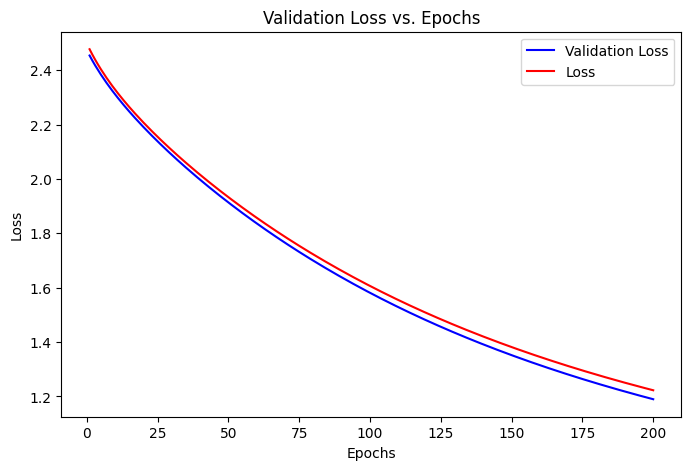

In [ ]:
import matplotlib.pyplot as plt


# Plot the history
# Extracting the loss on the validation set
val_loss = history.history['val_loss']
loss = history.history['loss']

# Extracting the number of epochs
epochs = range(1, len(val_loss) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.plot(epochs, loss, 'r-', label='Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

... it looks like nearly 1 in 10 images are incorrectly classified.
Can we do better than that?

### Exercise: Improving with hidden layers

You are required to:

* Implement a Multilayer Perceptron (MLP) with:

    Two hidden Dense layers (128 neurons each, ReLU activation)

    One output layer (10 neurons, Softmax activation)

* Compile the model using:

    SGD optimizer

    Categorical crossentropy loss

    Accuracy as evaluation metric

* Train the model with batch size 128 and 20% validation split.

* Evaluate and report the final test accuracy.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

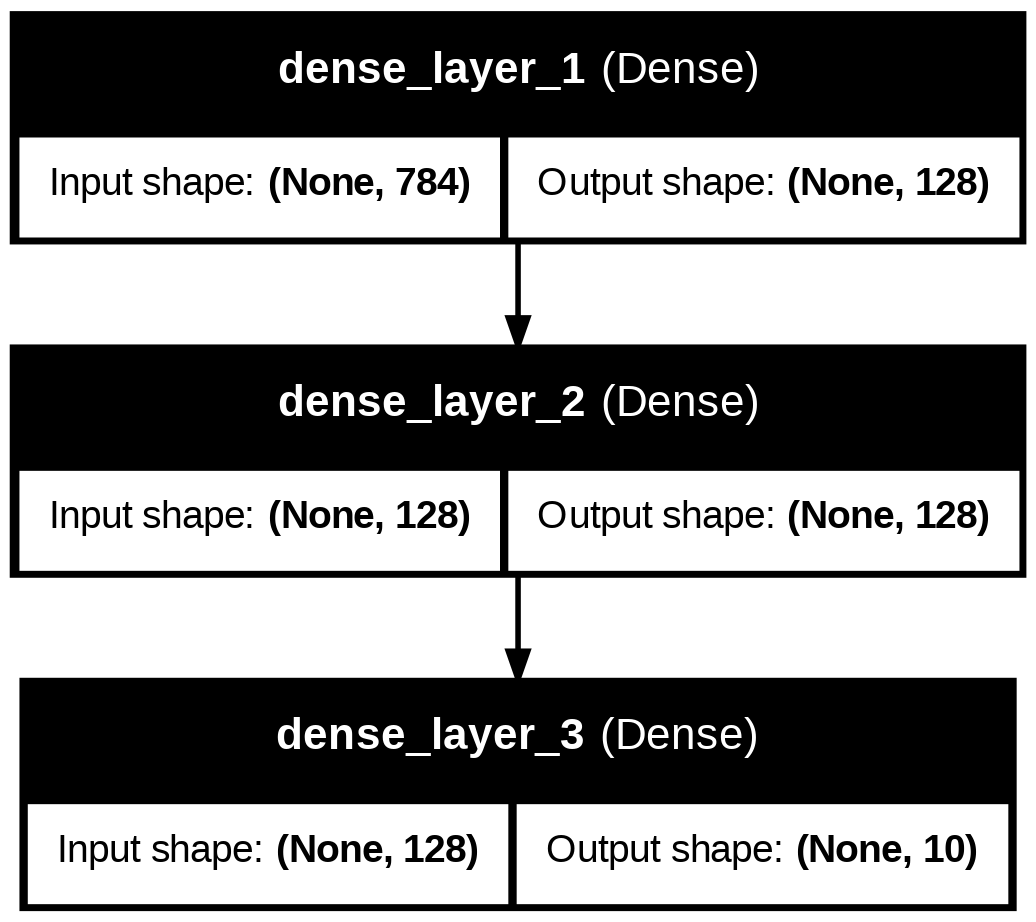

In [29]:
# Network and training.


EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# Build the model.
model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN, #number of units (neurons)
                              input_shape=(RESHAPED,),
                              name='dense_layer_1', # a name to the layer
                              activation='relu')) #activation function
model.add(keras.layers.Dense(N_HIDDEN, #number of units (neurons)
                              # input_shape=(RESHAPED,) --> here we don't have anything because it takes the input from the previous one
                              name='dense_layer_2', # a name to the layer
                              activation='relu')) #activation function
model.add(keras.layers.Dense(NB_CLASSES, #number of units (neurons)                       
                              name='dense_layer_3', # a name to the layer
                              activation='softmax')) #activation function

model.summary()



# Summary of the model.


# For a graphical visualization
tf.keras.utils.plot_model(model, to_file='model_hl.png', show_shapes=True, show_layer_names=True)

#Image('model_hl.png')

## 100,480 = 784 * 128 + 128
## 16,152 = 128 * 128 + 128
## 1,290 = 128 * 10 + 10

In [30]:
# Compiling the model.
model.compile(optimizer='SGD',  ## "SGD" wasn't good.
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training the model
EPOCHS = 200
BATCH_SIZE = 128 # how many training examples are processed together in one forward pass through the model --> each epoch has 1500 iteration, because the batch size is 32 (48000 which is the training set is divided by 32 = 1500)
VERBOSE = 1 #0: Silent training (no output), 1: Progress bar (shows a progress bar for each epoch),2: One line per epoch (shows a summary for each epoch).
NB_CLASSES = 10 # number of outputs = number of digits
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

# Training the model
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)


Epoch 1/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4581 - loss: 1.8295 - val_accuracy: 0.8483 - val_loss: 0.6869
Epoch 2/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8452 - loss: 0.6262 - val_accuracy: 0.8888 - val_loss: 0.4370
Epoch 3/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8796 - loss: 0.4447 - val_accuracy: 0.8992 - val_loss: 0.3655
Epoch 4/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8932 - loss: 0.3770 - val_accuracy: 0.9058 - val_loss: 0.3315
Epoch 5/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9015 - loss: 0.3459 - val_accuracy: 0.9109 - val_loss: 0.3089
Epoch 6/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9093 - loss: 0.3211 - val_accuracy: 0.9156 - val_loss: 0.2920
Epoch 7/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9123 - loss: 0.3054 - val_accuracy: 0.9195 - val_loss: 0.2795
Epoch 8/200
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9161 - loss: 0.2936 - val_accu

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


# Plot the history
# Extracting the loss on the validation set
val_loss = history.history['val_loss']
loss = history.history['loss']

# Extracting the number of epochs
epochs = range(1, len(val_loss) + 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.plot(epochs, loss, 'r-', label='Loss')
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
